# Лабораторная работа №1. Основы работы с библиотеками Gym, Tensorflow и PyTorch

Горюнов Н.С., гр. 5140201/30301

In [26]:
!pip install -q gymnasium

In [3]:
print('hello')

hello


## 1 Задание №1

Создать среду Taxi-v3, отобразить кадры среды, значение временного шага, код состояния, код действия, значение вознаграждения для 10 случайных действий.

In [133]:
import gymnasium as gym

In [134]:
env = gym.make("Taxi-v3", render_mode="ansi")
state, info = env.reset()

for step in range(10):
  action = env.action_space.sample()
  next_state, reward, done, truncated, info = env.step(action)

  print(f"Step: {step + 1}")
  print(f"Action: {action}")
  print(f"Done: {done}")
  print(f"Reward: {reward}")
  print(f"State:\n{env.render()}")

  state = next_state

  if done:
    state, info = env.reset()
    break

env.close()

Step: 1
Action: 3
Done: False
Reward: -1
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step: 2
Action: 5
Done: False
Reward: -10
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Step: 3
Action: 3
Done: False
Reward: -1
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step: 4
Action: 0
Done: False
Reward: -1
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 5
Action: 3
Done: False
Reward: -1
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step: 6
Action: 3
Done: False
Reward: -1
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step: 7
Action: 1
Done: False
Reward: -1
State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)



## 2 Задание №2

Используя библиотеку tensorflow, создайте, обучите и оцените свою модель, используя датасет, отличный от MNIST.

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Количество экземпляров в каждом классе:
target
0    50
1    50
2    50
Name: count, dtype: int64


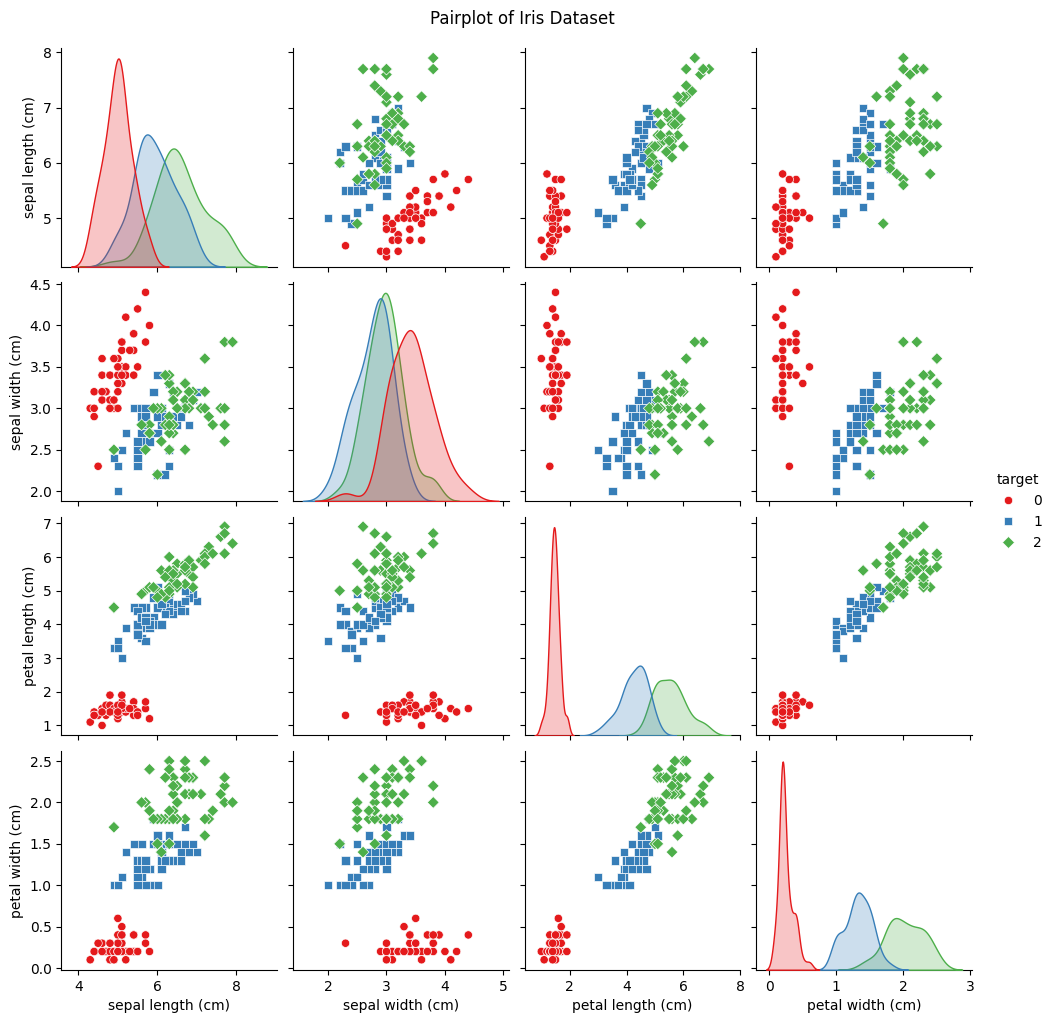

In [139]:
# Загружаем датасет
data = load_iris()
X, y = data.data, data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print(df.head())
print("\nКоличество экземпляров в каждом классе:")
print(df['target'].value_counts())

# Парный график для всех признаков с цветом по целевой переменной
sns.pairplot(df, hue='target', palette='Set1', diag_kind='kde', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Dataset', y=1.02)  # Заголовок
plt.show()

In [140]:
# Стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [156]:
# Модель
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(len(np.unique(y)), activation="softmax")  # Для многоклассовой классификации
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [157]:
# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1847 - loss: 1.2326 - val_accuracy: 0.3750 - val_loss: 1.1616
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5826 - loss: 1.0983 - val_accuracy: 0.5417 - val_loss: 1.0342
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6737 - loss: 0.9934 - val_accuracy: 0.6250 - val_loss: 0.9124
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6305 - loss: 0.9206 - val_accuracy: 0.6250 - val_loss: 0.8102
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6228 - loss: 0.8469 - val_accuracy: 0.6667 - val_loss: 0.7230
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7086 - loss: 0.7650 - val_accuracy: 0.7917 - val_loss: 0.6484
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7874 - loss: 0.7147 - val_accuracy: 0.7500 - val_loss: 0.5862
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7632 - loss: 0.6670 - val_accuracy: 0.7917 - val_loss: 0.5347
Epoch 


Test Accuracy: 0.9667


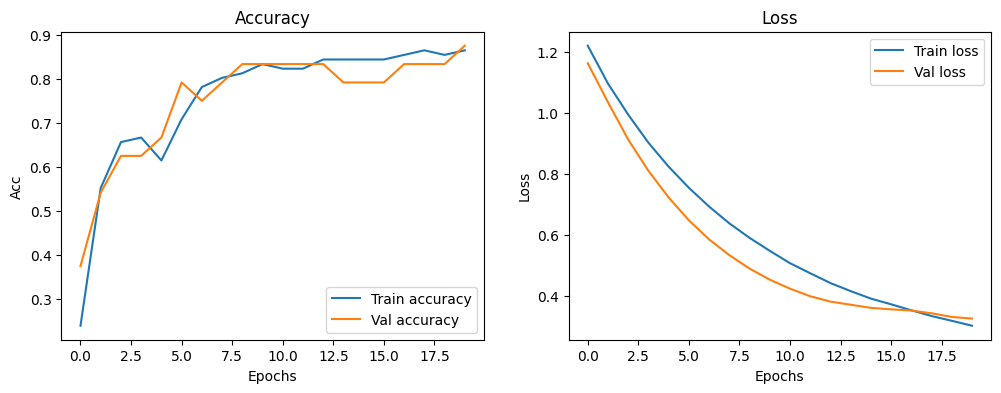

In [158]:
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Визуализация результатов
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

## 3 Задание №3

Самостоятельно изучить функции библиотеки PyTorch для Python: https://pytorch.org/get-started/locally/, https://pytorch.org/docs/stable/index.html.

Используя библиотеку pytorch, повторить создание, обучение и оценку модели из Задания №2.

In [159]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [160]:
# Загружаем датасет
data = load_iris()
X, y = data.data, data.target

# Стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [161]:
# Преобразуем в тензоры PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [168]:
# Строим модель для классификации
class IrisModel(nn.Module):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 3)   # 3 класса на выходе

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = IrisModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [169]:
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Обучение модели
epochs = 30
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Обучение на обучающей выборке
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Сохраняем метрики для обучающей выборки
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    # Оценка модели на валидационной выборке
    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Сохраняем метрики для валидационной выборки
    val_losses.append(val_loss / len(test_loader))
    val_accuracies.append(100 * correct / total)

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}, "
          f"Train Accuracy: {100 * correct / total:.2f}%, Val Accuracy: {100 * correct / total:.2f}%")

Epoch [1/30], Loss: 1.0958, Train Accuracy: 56.67%, Val Accuracy: 56.67%
Epoch [2/30], Loss: 1.0246, Train Accuracy: 76.67%, Val Accuracy: 76.67%
Epoch [3/30], Loss: 0.9663, Train Accuracy: 90.00%, Val Accuracy: 90.00%
Epoch [4/30], Loss: 0.9041, Train Accuracy: 93.33%, Val Accuracy: 93.33%
Epoch [5/30], Loss: 0.8583, Train Accuracy: 90.00%, Val Accuracy: 90.00%
Epoch [6/30], Loss: 0.8041, Train Accuracy: 90.00%, Val Accuracy: 90.00%
Epoch [7/30], Loss: 0.7512, Train Accuracy: 93.33%, Val Accuracy: 93.33%
Epoch [8/30], Loss: 0.7020, Train Accuracy: 90.00%, Val Accuracy: 90.00%
Epoch [9/30], Loss: 0.6551, Train Accuracy: 93.33%, Val Accuracy: 93.33%
Epoch [10/30], Loss: 0.6076, Train Accuracy: 93.33%, Val Accuracy: 93.33%
Epoch [11/30], Loss: 0.5706, Train Accuracy: 93.33%, Val Accuracy: 93.33%
Epoch [12/30], Loss: 0.5317, Train Accuracy: 93.33%, Val Accuracy: 93.33%
Epoch [13/30], Loss: 0.4915, Train Accuracy: 93.33%, Val Accuracy: 93.33%
Epoch [14/30], Loss: 0.4758, Train Accuracy: 93

Accuracy: 1.00


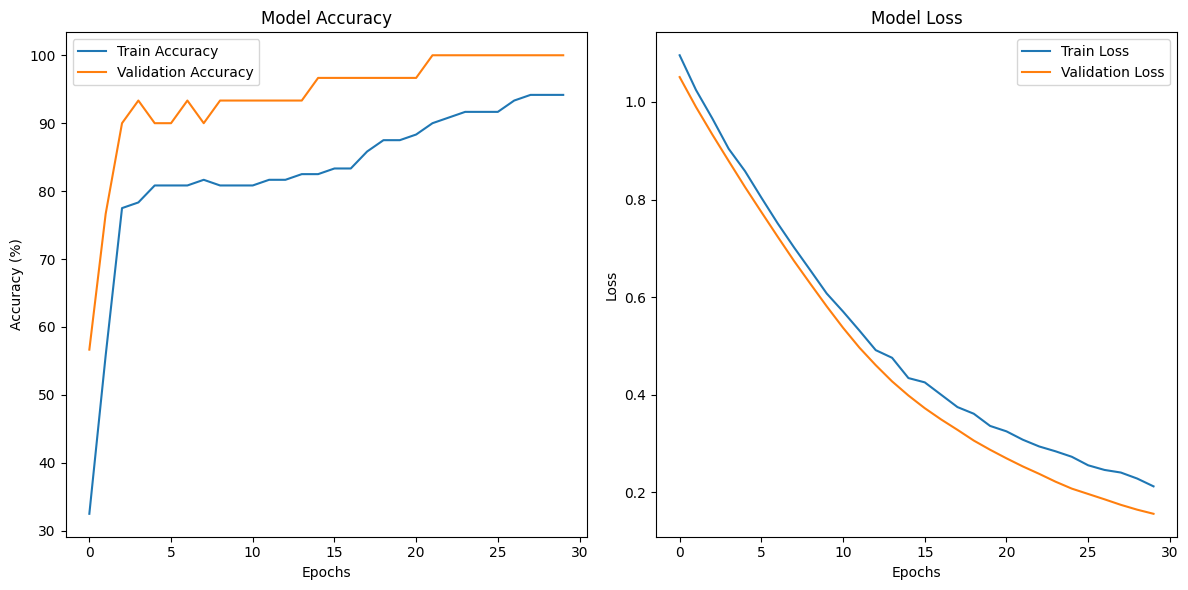

In [171]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {correct / total:.2f}')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_accuracies, label='Train Accuracy')
plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
import gymnasium as gym
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim